# Tensorflow实例1:线性回归

## 前言

我们之前已经介绍了不少deep learning相关的内容[见这里]()，以及目前在生物领域的相关应用的综述[见这里]()，so，我们的关注点近来就转向了deep learning，并决定开始扎扎实实和大家一起共同学习这个。综合考虑技术普适性和可靠性，我们选定了Tensoflow作为技术学习框架（[Tensorflow的安装教程]()）,学习方式则是从实例出发，辅以相应的注释当作说明，套路是行话，save the word, show you the code。例如从简单的线性回归开始，即本章，然后逐渐加入deep learning相关模型以及tensorflow相关特性内容，希望和大家共同进步。整个项目可见：https://github.com/NGSHotpot/tensorflow_learning_examples

In [5]:
#import 相关模块，pylab和seaborn用于可视化，numpy负责常规数据运算，tensorflow则是主要学习对象
import pylab
import numpy as np
import seaborn as sns
import tensorflow as tf 

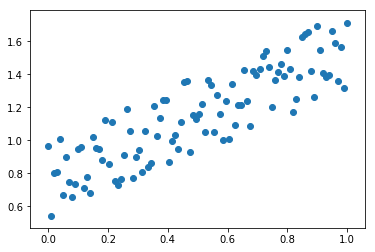

In [6]:
#测试数据，非常简单, y=0.8x + 0.5 +noise, noise~(-0.5,0.5),x~(0.0,1.0)
n = 1000
x = np.linspace(0,1,100)
noise = np.random.random(100)*0.5
y = 0.8*x + 0.5 + noise 
#数据可视化，大致看一下数据样子
pylab.scatter(x,y)
pylab.show()

In [8]:
#deep learning相关参数

#学习率，最常用的参数，例如随机梯度下降算法（GSD）中需要，常用设置就是1,1e-1,1e-2,1e-3等等，实际使用中需要尝试几下
learning_rate = 0.1 

#关键概念，要和iteration，batch_size有区分，
#1）iteration：迭代，每次迭代更新1次网络结构的参数；
#2）batch_size: 每次迭代用的样本量；
#3) epoch:把所有数据训练一遍，即整体而言把所有数据训练多少次；
epochs = 500 

# 显示步长，即训练多少epoch后显示一下训练效果
step = 100 

In [9]:
#tensorflow 变量相关设置
#可以把tensorflow当作一个单独的运算环境，所以目前其使用的变量和运算操作都要像C语言那样按照数据类型先定义再使用

#变量x和y 
tf_x = tf.placeholder("float")
tf_y = tf.placeholder("float")

#线性模型需要求解的weight和bias
w = tf.Variable(np.random.random(),name="weight")
b = tf.Variable(np.random.random(),name="bias")

In [12]:
#目标拟合函数，如上所言，运算操作要用tensorflow自带和定义的操作，就不能再用numpy中的一些函数了
pred = tf.add(tf.multiply(tf_x,w),b)

#损失函数
cost = tf.reduce_sum(tf.pow(pred-tf_y,2)) / (2*n)

#求解器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
#tensorflow运算过程

#用来记录训练过程中的模型参数以及拟合的y值
ss,ys = [],[]

#所有变量初始化，直接调用这个init就好了，固定操作
init = tf.global_variables_initializer()

#Session是最关键的概念，例如想要显示一个变量和常量，也是需要print tf.Seesion().run()一下的
#可以当作运算过程中tenforflow中所有的内容都在Session中了

with tf.Session() as sess:
    sess.run(init)
    for epoch in xrange(epochs):
        for (nx,ny) in zip (x,y):
            #每个epoch的目的，训练一下
            sess.run(optimizer,feed_dict={tf_x:nx,tf_y:ny})
        if epoch % step == 0:
            c = sess.run(cost,feed_dict={tf_x:x,tf_y:y})
            s = "Epoch:%s,cost:%s,w:%s,b:%s"%(epoch,c,sess.run(w),sess.run(b))
            ss.append(s)
            ys.append(sess.run(w)*x+sess.run(b))

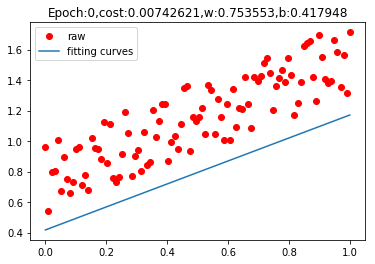

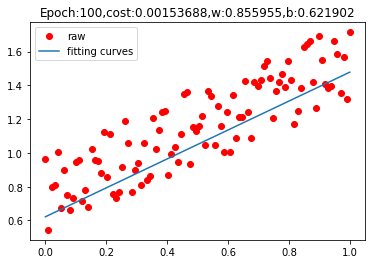

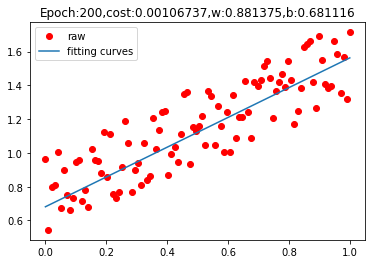

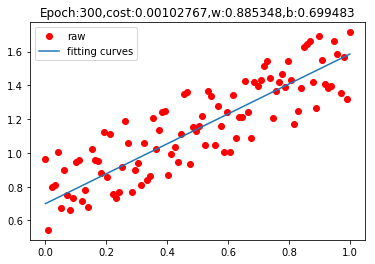

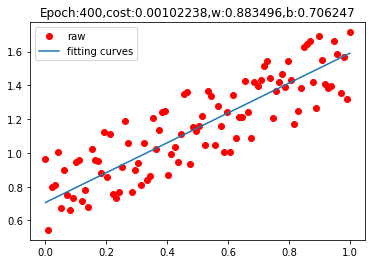

In [17]:
#可视化一下训练过程，感觉还不错，那就任务完成啦,其实epoch200次左右就差不多啦
#大家可以更改一下noise看看需要多少epoch训练完成
for i in xrange(len(ys)):
    pylab.plot(x,y,"ro",label="raw")
    pylab.plot(x,ys[i],label="fitting curves")
    pylab.title(ss[i])
    pylab.legend()
    pylab.show()
